<a href="https://colab.research.google.com/github/sujendangol/nlp_health-chatbot/blob/main/Healthcare_NLP_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import json

with open('/content/drive/MyDrive/Colab Notebooks/dataset/intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses,context_set
0,Cuts,"[What to do if Cuts?, How to cure Cuts?, Which...",[Wash the cut properly to prevent infection an...,
1,Abrasions,"[how do you treat abrasions?, Do Abrasions cau...",[Begin with washed hands.Gently clean the area...,
2,stings,"[How do you treat Sting?, Stings, What to do i...",[Remove any stingers immediately. Some experts...,
3,Splinter,"[How to remove Splinters, How to cure Splinter...",[1. SOAK IT IN EPSOM SALTS. Dissolve a cup of ...,
4,Sprains,"[How do you treat a sprain?, what to do if i g...",[Use an ice pack or ice slush bath immediately...,
5,Strains,"[How do you treat a strain?, what to do if i g...","[Rest,Ice,Compression and Elevation can be use...",
6,Fever,"[How do you treat a mild Fever?, what to do if...",[To treat a fever at home: 1)Drink plenty of f...,
7,Nasal Congestion,"[How do you treat nasal Congestion?, what to d...","[When you’re stuffed up, focus on keeping your...",
8,Cough,"[How to cure cough?, How do you treat cough?, ...","[1) Honey:- Use honey to treat a cough, mix 2 ...",
9,Sore Throat,"[How do you treat sore throat?, what to do if ...",[1) Make sure you get plenty of rest and drink...,


In [ ]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,Cuts,What to do if Cuts?,[Wash the cut properly to prevent infection an...
1,Cuts,How to cure Cuts?,[Wash the cut properly to prevent infection an...
2,Cuts,Which medicine to apply for Cuts?,[Wash the cut properly to prevent infection an...
3,Cuts,what to apply on cuts?,[Wash the cut properly to prevent infection an...
4,Cuts,Cuts,[Wash the cut properly to prevent infection an...
...,...,...,...
183,CPR,How to help a drowning person in CPR?,"[1)For an adult or child, place the heel of on..."
184,Fracture,How do you treat a Fracture?,[1)Stop any bleeding. Apply pressure to the wo...
185,Fracture,what to do if i get a Fracture?,[1)Stop any bleeding. Apply pressure to the wo...
186,Fracture,Which medicine to take if I have a Fracture?,[1)Stop any bleeding. Apply pressure to the wo...


In [ ]:
df['tag'].unique()


array(['Cuts', 'Abrasions', 'stings', 'Splinter', 'Sprains', 'Strains',
       'Fever', 'Nasal Congestion', 'Cough', 'Sore Throat',
       'Gastrointestinal problems', 'Skin problems', 'Abdonominal Pain',
       'Bruises', 'Broken Toe', 'Choking', 'Wound', 'Diarrhea',
       'Frost bite', 'Heat Exhaustion', 'Heat Stroke', 'Insect Bites',
       'nose bleed', 'Pulled Muscle', 'Rectal bleeding', 'Sun Burn',
       'Testicle Pain', 'Vertigo', 'Normal Bleeding', 'Eye Injury',
       'Chemical Burn', 'Poison', 'Teeth', 'seizure', 'Head Injury',
       'Fainting', 'Headache', 'Cold', 'Rash', 'snake bite',
       'animal bite', 'Drowning', 'CPR', 'Fracture'], dtype=object)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 188,
 'word_counts': '{"what": 49, "to": 135, "do": 93, "if": 87, "cuts": 5, "how": 87, "cure": 37, "which": 43, "medicine": 41, "apply": 8, "for": 3, "on": 1, "you": 47, "treat": 43, "abrasions": 6, "cause": 1, "scars": 1, "sting": 3, "stings": 1, "get": 65, "a": 92, "remove": 1, "splinters": 3, "i": 80, "have": 8, "bring": 1, "splinter": 1, "the": 2, "surface": 1, "sprain": 4, "cream": 2, "strain": 5, "diagnose": 1, "is": 4, "heat": 7, "or": 1, "ice": 1, "better": 1, "pulled": 5, "muscle": 5, "mild": 8, "fever": 4, "take": 38, "nasal": 4, "congestion": 4, "blocked": 2, "nose": 6, "long": 1, "does": 1, "last": 1, "cough": 5, "rid": 1, "of": 1, "sore": 4, "throat": 4, "gas": 3, "problems": 4, "gastrointestinal": 1, "problem": 1, "skin": 4, "allergy": 3, "abdonominal": 4, "pain": 8, "bruises": 2, "bruise": 2, "broken": 8, "to

In [ ]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

number of unique words =  131


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (188, 11)
y shape =  (188,)
num of classes =  44


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 11, 100)           13200     
                                                                 
 lstm (LSTM)                 (None, 11, 32)            17024     
                                                                 
 layer_normalization (Layer  (None, 11, 32)            64        
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 11, 32)            8320      
                                                                 
 layer_normalization_1 (Lay  (None, 11, 32)            64        
 erNormalization)                                                
                                                                 
 lstm_2 (LSTM)               (None, 32)                8

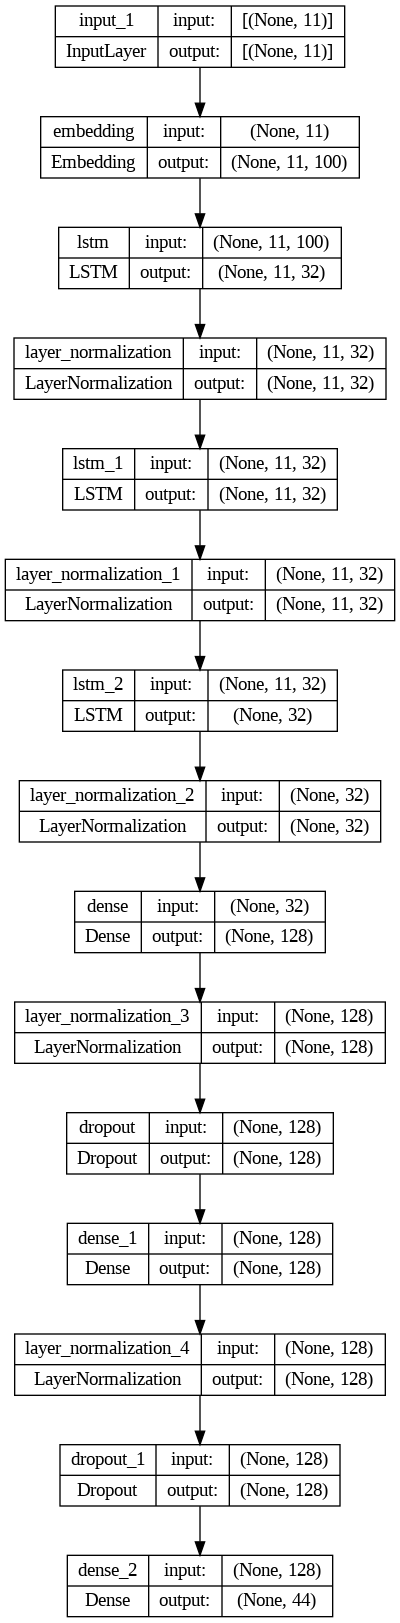

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Input(shape=(X.shape[1])))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [ ]:
model_history = model.fit(x=X,
                          y=y,
                          batch_size=10,
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
                          epochs=50)

Epoch 1/50
19/19 [==============================] - 21s 28ms/step - loss: 4.8348 - accuracy: 0.0106
Epoch 2/50
19/19 [==============================] - 1s 29ms/step - loss: 4.1533 - accuracy: 0.0426
Epoch 3/50
19/19 [==============================] - 1s 28ms/step - loss: 3.9973 - accuracy: 0.0479
Epoch 4/50
19/19 [==============================] - 1s 29ms/step - loss: 3.6899 - accuracy: 0.0798
Epoch 5/50
19/19 [==============================] - 1s 28ms/step - loss: 3.4991 - accuracy: 0.1330
Epoch 6/50
19/19 [==============================] - 1s 29ms/step - loss: 2.9284 - accuracy: 0.1809
Epoch 7/50
19/19 [==============================] - 1s 30ms/step - loss: 2.6814 - accuracy: 0.2819
Epoch 8/50
19/19 [==============================] - 1s 28ms/step - loss: 2.3253 - accuracy: 0.3457
Epoch 9/50
19/19 [==============================] - 1s 30ms/step - loss: 1.7410 - accuracy: 0.5213
Epoch 10/50
19/19 [==============================] - 1s 28ms/step - loss: 1.4039 - accuracy: 0.6702
Epoch 11

In [ ]:
import re
import random

def generate_answer(pattern):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    print("you: {}".format(pattern))
    print("model: {}".format(random.choice(responses)))

In [ ]:
generate_answer('Hi! How are you?')


1/1 [==============================] - 4s 4s/step
you: Hi! How are you?
model: 1) Honey:- Use honey to treat a cough, mix 2 teaspoons (tsp) with warm water or an herbal tea. Drink this mixture once or twice a day. Do not give honey to children under 1 year of age. 2) Ginger:- Brew up a soothing ginger tea by adding 20–40 grams (g) of fresh ginger slices to a cup of hot water. Allow to steep for a few minutes before drinking. Add honey or lemon juice to improve the taste and further soothe a cough. 3) Fluids:- Staying hydrated is vital for those with a cough or cold. Research indicates that drinking liquids at room temperature can alleviate a cough, runny nose, and sneezing.


In [ ]:
generate_answer('difference between sadness and depression')

1/1 [==============================] - 0s 42ms/step
you: difference between sadness and depression
model: 1)For an adult or child, place the heel of one hand on the center of the chest at the nipple line. You can also push with one hand on top of the other. For an infant, place two fingers on the breastbone. 2)For an adult or child, press down at least 2 inches. Make sure not to press on ribs. For an infant, press down about 1 and 1/2 inches. Make sure not to press on the end of the breastbone. 3)Do chest compressions only, at the rate of 100-120 per minute or more. Let the chest rise completely between pushes. 4)Check to see if the person has started breathing.


In [ ]:
generate_answer('Open adverse drugs module')


1/1 [==============================] - 0s 26ms/step
you: Open adverse drugs module
model: 1)For an adult or child, place the heel of one hand on the center of the chest at the nipple line. You can also push with one hand on top of the other. For an infant, place two fingers on the breastbone. 2)For an adult or child, press down at least 2 inches. Make sure not to press on ribs. For an infant, press down about 1 and 1/2 inches. Make sure not to press on the end of the breastbone. 3)Do chest compressions only, at the rate of 100-120 per minute or more. Let the chest rise completely between pushes. 4)Check to see if the person has started breathing.


In [ ]:
generate_answer('How do you treat nasal Congestion?')

1/1 [==============================] - 0s 38ms/step
you: How do you treat nasal Congestion?
model: When you’re stuffed up, focus on keeping your nasal passages and sinuses moist. To keep your nasal passages moist, you can: 1)Use a humidifier or vaporizer. 2)Drink lots of fluids. This will thin out your mucus, which could help prevent blocked sinuses. 3)Place a warm, wet towel on your face. It may relieve discomfort and open your nasal passages.


In [ ]:
generate_answer('How do you treat a blocked nose?')

1/1 [==============================] - 0s 53ms/step
you: How do you treat a blocked nose?
model: When you’re stuffed up, focus on keeping your nasal passages and sinuses moist. To keep your nasal passages moist, you can: 1)Use a humidifier or vaporizer. 2)Drink lots of fluids. This will thin out your mucus, which could help prevent blocked sinuses. 3)Place a warm, wet towel on your face. It may relieve discomfort and open your nasal passages.
